In [6]:
#TIROIDES Y CORAZON

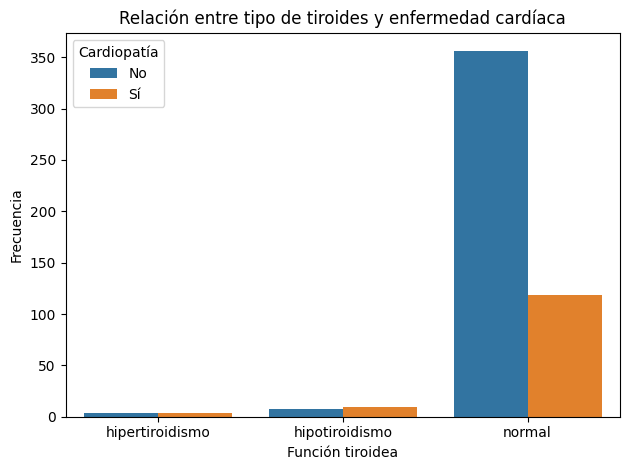

Optimization terminated successfully.
         Current function value: 0.553010
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            cardiopatia   No. Observations:                  500
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                           12
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                 0.04191
Time:                        17:27:33   Log-Likelihood:                -276.51
converged:                       True   LL-Null:                       -288.60
Covariance Type:            nonrobust   LLR p-value:                   0.01917
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.2239      1.451      1.533      0.

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
df = pd.read_csv(r"C:\Users\usuario2\Desktop\curso 104\Python\ejemplos python\Ejemplos\Ejemplos\datos_tiroides_cardiopatia.csv")

# 2. Convertir variables categóricas a tipo 'category'
df['sexo'] = df['sexo'].astype('category')
df['tiroides'] = df['tiroides'].astype('category')
df['cardiopatia'] = df['cardiopatia'].astype(int)

# 3. Visualizar relación entre tiroides y cardiopatía
sns.countplot(data=df, x='tiroides', hue='cardiopatia')
plt.title("Relación entre tipo de tiroides y enfermedad cardíaca")
plt.xlabel("Función tiroidea")
plt.ylabel("Frecuencia")
plt.legend(title="Cardiopatía", labels=["No", "Sí"])
plt.tight_layout()
plt.show()

# 4. Crear el modelo de regresión logística
modelo = smf.logit(
    formula='cardiopatia ~ C(tiroides) + tsh + t3 + t4 + edad + C(sexo) + imc + hta + ldl + dm + fumador',
    data=df
).fit()

# 5. Resumen del modelo
print(modelo.summary())

# 6. Odds Ratios (riesgo relativo aproximado)
odds_ratios = pd.DataFrame({
    'OR': modelo.params.apply(lambda x: round(np.exp(x), 2)),
    'p-valor': modelo.pvalues
})
print("\nOdds Ratios:\n", odds_ratios)


In [10]:
pip install lifelines

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4138 sha256=b230b05c3beeefbc38acea163255ffa66a357defe0bb329e15e5d0bb57c35ce6
  Stored in directory: c:\users\usuario2\appdata\local\pip\cache\wheels\7e\16\46\9477f188924292d3bf1fb8fb42844201591abfc19b7ba6d868
Successfully built autograd-gamma

   ------ --------------------------------- 1/6 [interface-meta]
   ------------- -------------------------- 2/6 [autograd]
   ------------- -------------------------- 2/6 [autograd]
   -------------------------- ------------- 4/6 [formulaic]
   -------------------------- ------------- 4/6 [formulaic]
   -------------------------- -----

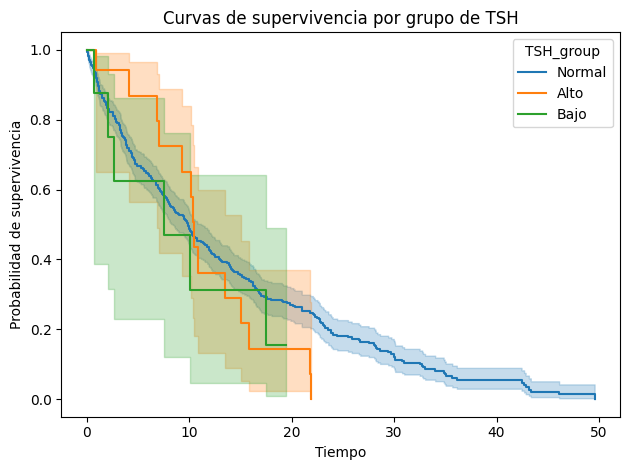

In [12]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Crear columna 'TSH_group' categorizando los valores de tsh
df['TSH_group'] = pd.cut(df['tsh'], bins=[-np.inf, 0.5, 4.5, np.inf], labels=['Bajo', 'Normal', 'Alto'])

# Crear columnas dummy 'time' y 'status' si no existen (para ejemplo)
if 'time' not in df.columns:
    np.random.seed(42)
    df['time'] = np.random.exponential(scale=10, size=len(df))
if 'status' not in df.columns:
    df['status'] = np.random.binomial(1, 0.7, size=len(df))

kmf = KaplanMeierFitter()

for group in df['TSH_group'].unique():
    mask = df['TSH_group'] == group
    kmf.fit(df[mask]['time'], event_observed=df[mask]['status'], label=str(group))
    kmf.plot_survival_function()

plt.title("Curvas de supervivencia por grupo de TSH")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de supervivencia")
plt.legend(title="TSH_group")
plt.tight_layout()
plt.show()

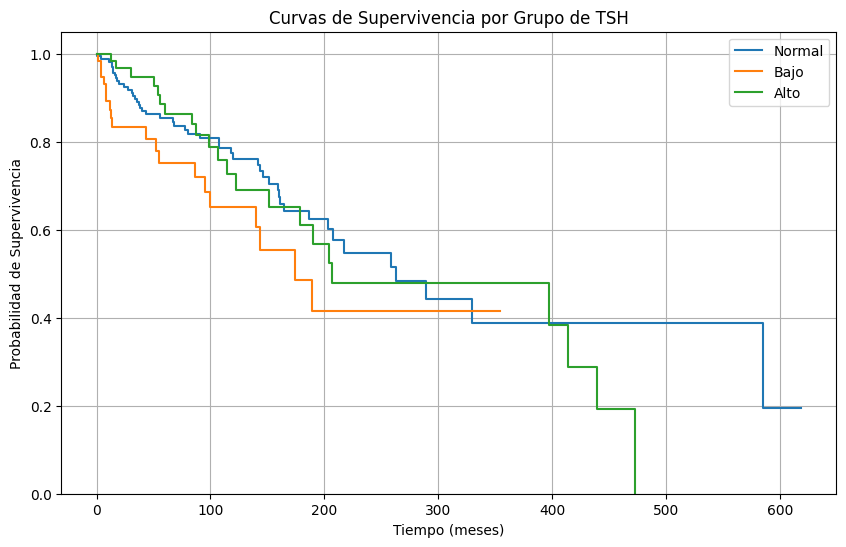

Log-Rank Test (Normal vs Alto): p-value = 0.6454
Test de Log-Rank (multigrupo): p-value = 0.1618


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import numpy as np

# 1. Datos de ejemplo (simulados)
data = {
    'time': np.random.exponential(100, size=300),  # Tiempo de seguimiento (meses)
    'event': np.random.binomial(1, 0.3, size=300),  # 1: evento (muerte), 0: censurado
    'TSH_group': np.random.choice(['Normal', 'Alto', 'Bajo'], size=300, p=[0.6, 0.2, 0.2])  # Grupos
}
df = pd.DataFrame(data)

# 2. Crear curvas de supervivencia
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

# Graficar cada grupo
groups = df['TSH_group'].unique()
for group in groups:
    mask = df['TSH_group'] == group
    kmf.fit(df[mask]['time'], df[mask]['event'], label=group)
    kmf.plot_survival_function(ci_show=False)  # Omitir intervalos de confianza para claridad

plt.title('Curvas de Supervivencia por Grupo de TSH')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Probabilidad de Supervivencia')
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

# 3. Test de Log-Rank para comparar grupos
results = logrank_test(
    df[df['TSH_group'] == 'Normal']['time'],
    df[df['TSH_group'] == 'Alto']['time'],
    event_observed_A=df[df['TSH_group'] == 'Normal']['event'],
    event_observed_B=df[df['TSH_group'] == 'Alto']['event']
)
print(f"Log-Rank Test (Normal vs Alto): p-value = {results.p_value:.4f}")

# Opcional: Comparar todos los grupos
from lifelines.statistics import multivariate_logrank_test
results_multi = multivariate_logrank_test(df['time'], df['TSH_group'], df['event'])
print(f"Test de Log-Rank (multigrupo): p-value = {results_multi.p_value:.4f}")

In [16]:
# 1. Verificar colinealidad (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Usar solo columnas continuas presentes en df
X = df[['time']]  # Solo 'time' está disponible como variable continua

if X.shape[1] > 1:
	vif_data = pd.DataFrame()
	vif_data["Variable"] = X.columns
	vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
	print(vif_data)
else:
	print("No se puede calcular VIF con una sola variable continua.")

# 2. Recategorizar TSH
# No existe columna 'tsh' en este df, pero sí 'TSH_group'
# Si quieres crear una regresión logística, puedes usar las columnas presentes
# Ejemplo: modelo usando 'TSH_group' y 'time'
import statsmodels.api as sm
df['TSH_group_cat'] = df['TSH_group'].astype('category').cat.codes
modelo_mejorado = sm.Logit(df['event'], sm.add_constant(df[['TSH_group_cat', 'time']])).fit()
print(modelo_mejorado.summary())

No se puede calcular VIF con una sola variable continua.
Optimization terminated successfully.
         Current function value: 0.607118
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  event   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                0.001473
Time:                        18:22:46   Log-Likelihood:                -182.14
converged:                       True   LL-Null:                       -182.40
Covariance Type:            nonrobust   LLR p-value:                    0.7644
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7534      0.266     -2.82